In [9]:
from typing import TypedDict, Literal
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal['RUB', 'EUR']
    total: float

In [ ]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_ruble(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd']* 78.5
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd']* 0.85
    return state
def choose_conversion(state: PortfolioState) -> str:
    return state['target_currency']

In [ ]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_ruble_node", convert_to_ruble)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        'RUB': "convert_to_ruble_node",
        'EUR': "convert_to_eur_node"
    }

)
builder.add_edge(["convert_to_ruble_node", "convert_to_eur_node"], END)

graph = builder.compile()

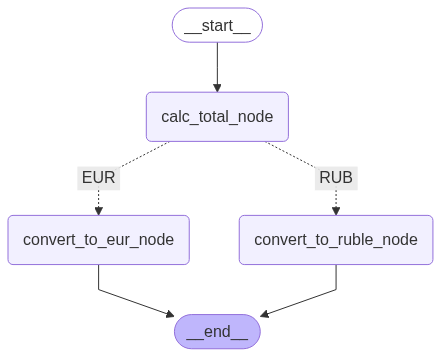

In [12]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
graph.invoke({"amount_usd": 1000.0, "target_currency": "EUR"})  

{'amount_usd': 1000.0,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 972.0}